# Experiment log
Collect experiments.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.tree
import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
import colorsys

## Experiment 1
Orange/brown circle on grey background.

### 1.1.1
Daylight, with poor environment controls. Data isn't fully serialized.

In [2]:
import json

In [3]:
data = pd.read_csv('../data/experiment_1_1_1.csv')

In [4]:
# Serialize the data, to make using it with scikit-learn easier.
data_serial = pd.concat([pd.DataFrame([
    [row['ans'], *json.loads(row['circle_rgb']), *json.loads(row['bg_rgb'])]],
    columns=['ans', 'circle_r', 'circle_g', 'circle_b', 'bg_r', 'bg_g', 'bg_b'])
 for idx, row in data.iterrows()])
data_serial.head()

,ans,circle_r,circle_g,circle_b,bg_r,bg_g,bg_b
0,3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,3,0.246837,0.213426,0.200337,0.977946,0.977946,0.977946
0,3,0.113288,0.104733,0.045887,0.818308,0.818308,0.818308
0,0,0.979565,0.420226,0.071191,0.690230,0.690230,0.690230
0,3,0.569356,0.505167,0.185052,0.510362,0.510362,0.510362


In [5]:
data_serial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ans       219 non-null    int64  
 1   circle_r  219 non-null    float64
 2   circle_g  219 non-null    float64
 3   circle_b  219 non-null    float64
 4   bg_r      219 non-null    float64
 5   bg_g      219 non-null    float64
 6   bg_b      219 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 13.7 KB


In [6]:
data_serial.describe()

,ans,circle_r,circle_g,circle_b,bg_r,bg_g,bg_b
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2.187215,0.522146,0.429388,0.262934,0.480307,0.480307,0.480307
std,1.221603,0.298772,0.267896,0.224879,0.285525,0.285525,0.285525
min,0.000000,0.001364,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.239660,0.197149,0.078438,0.221313,0.221313,0.221313
50%,3.000000,0.556740,0.410000,0.193327,0.512345,0.512345,0.512345
75%,3.000000,0.794788,0.657776,0.394948,0.718214,0.718214,0.718214
max,3.000000,1.000000,0.973452,0.952337,0.983227,0.983227,0.983227


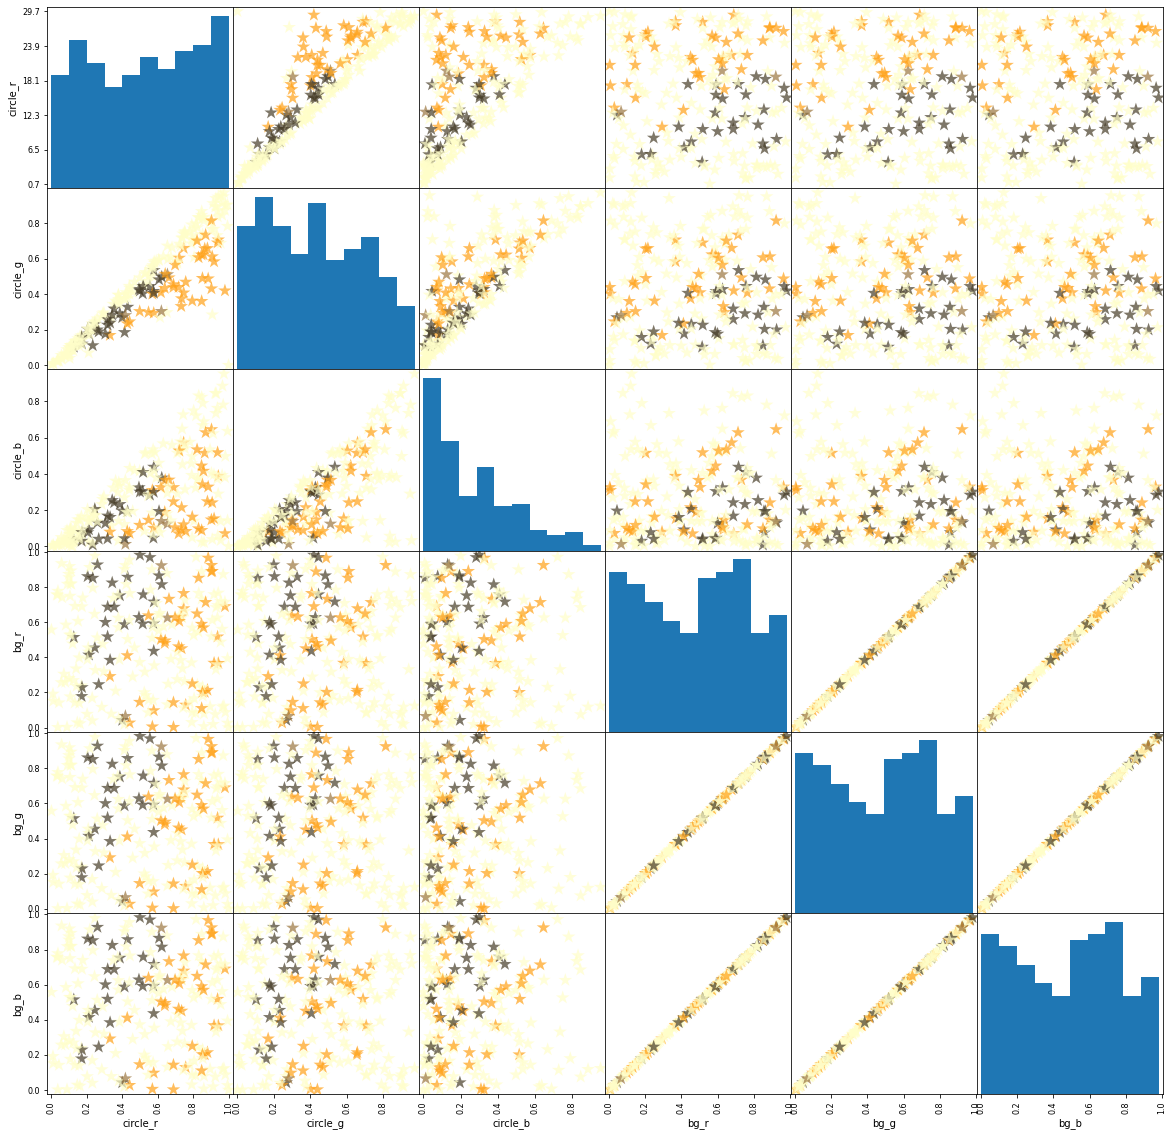

In [95]:
# orange, brown, both, neither
plot_colors = ['#ffa219', '#473d28', '#9c7741', '#fffec9']
color_list = [plot_colors[i] for i in data_serial.loc[:,'ans']]
ax1 = pd.plotting.scatter_matrix(data_serial.loc[:, data_serial.columns != 'ans'],
                          c=color_list,
                          figsize=[20,20],
                          diagonal='hist',
                          alpha=0.7,
                          s=200,
                          marker='*')
ax1[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

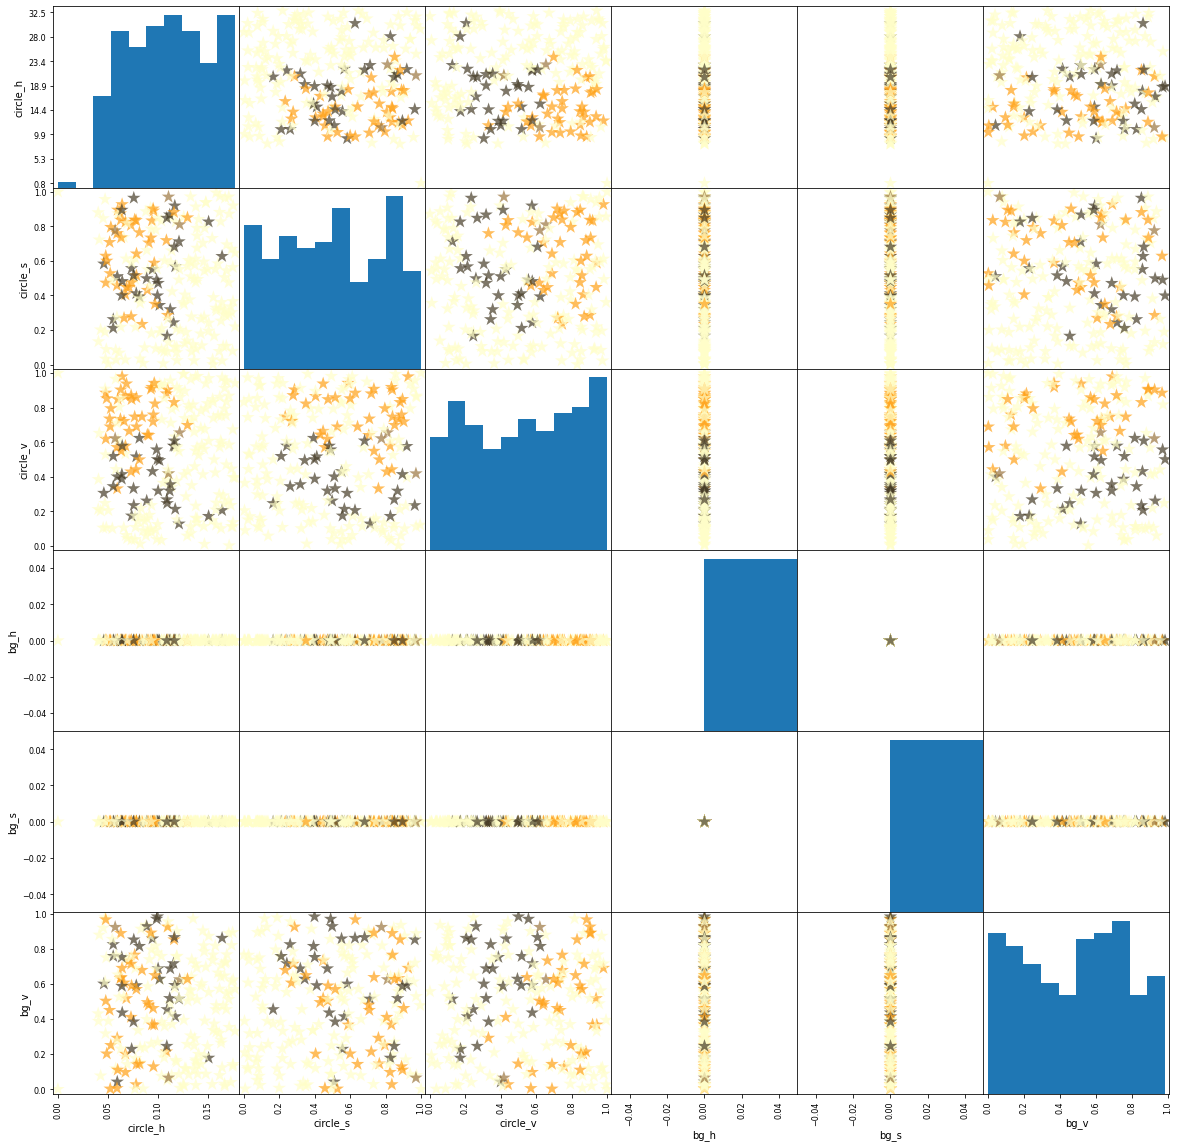

In [98]:
data_serial_hsv = pd.concat([pd.DataFrame([
    [row['ans'], *colorsys.rgb_to_hsv(*json.loads(row['circle_rgb'])), *colorsys.rgb_to_hsv(*json.loads(row['bg_rgb']))]],
    columns=['ans', 'circle_h', 'circle_s', 'circle_v', 'bg_h', 'bg_s', 'bg_v'])
 for idx, row in data.iterrows()])
ax2 = pd.plotting.scatter_matrix(data_serial_hsv.loc[:, data_serial_hsv.columns != 'ans'],
                          c=color_list,
                          figsize=[20,20],
                          diagonal='hist',
                          alpha=0.7,
                          s=200,
                          marker='*')
ax2[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

## Training

In [81]:
X = data_serial.iloc[:,1:]
y = data_serial.iloc[:,0]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.25)

clf = sk.tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
#prediction = clf.predict(X_test)
clf.score(X_test, y_test)

0.6545454545454545

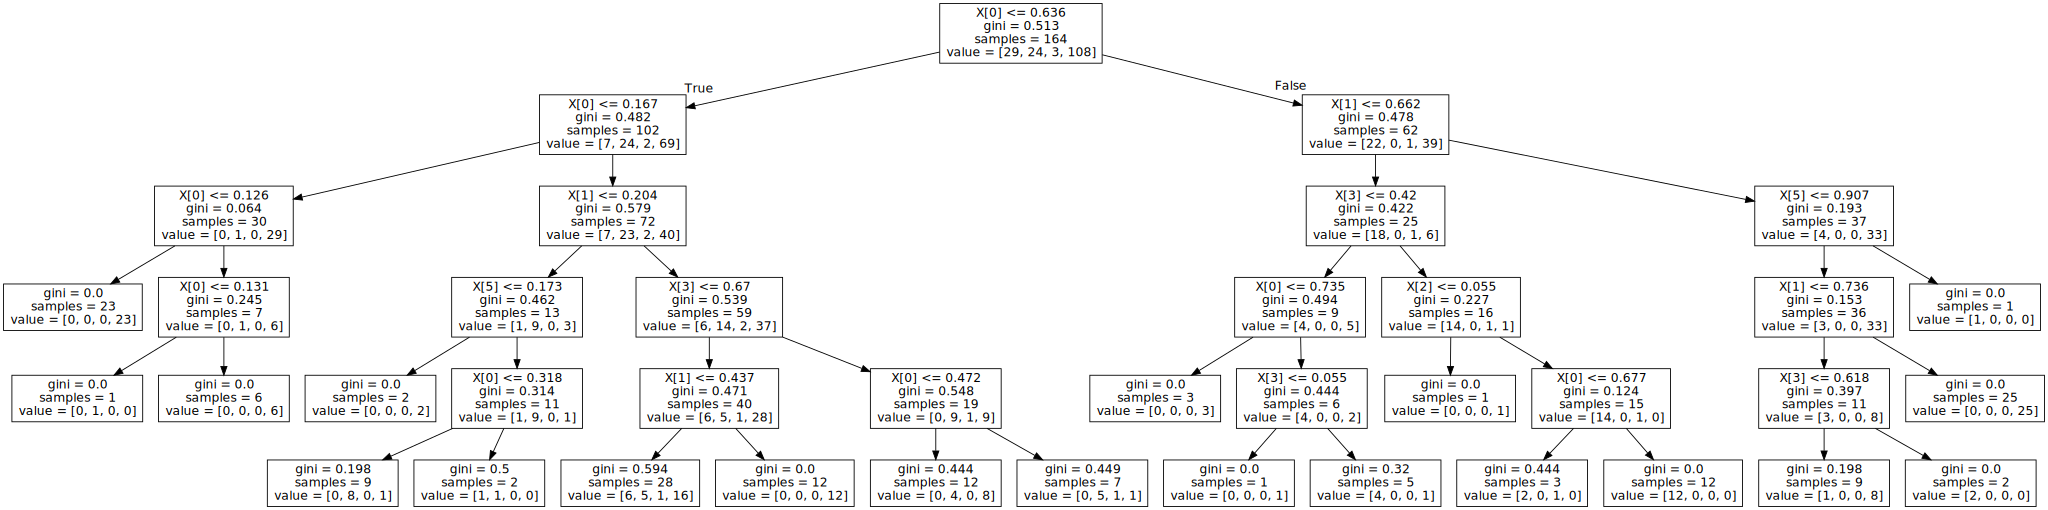

In [82]:
tree = sk.tree.export_graphviz(clf)
graph = graphviz.Source(tree)
graph.render("tree")
graph

In [99]:
X = data_serial_hsv.iloc[:,1:]
y = data_serial_hsv.iloc[:,0]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.25)

clf = sk.tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
#prediction = clf.predict(X_test)
clf.score(X_test, y_test)

0.7818181818181819

Note how in the below tree, X = [circle_hue, circle_saturation, circle_value, bg_hue, bg_saturation, bg_value], and X[2] and X[5] are being used to make decisions.

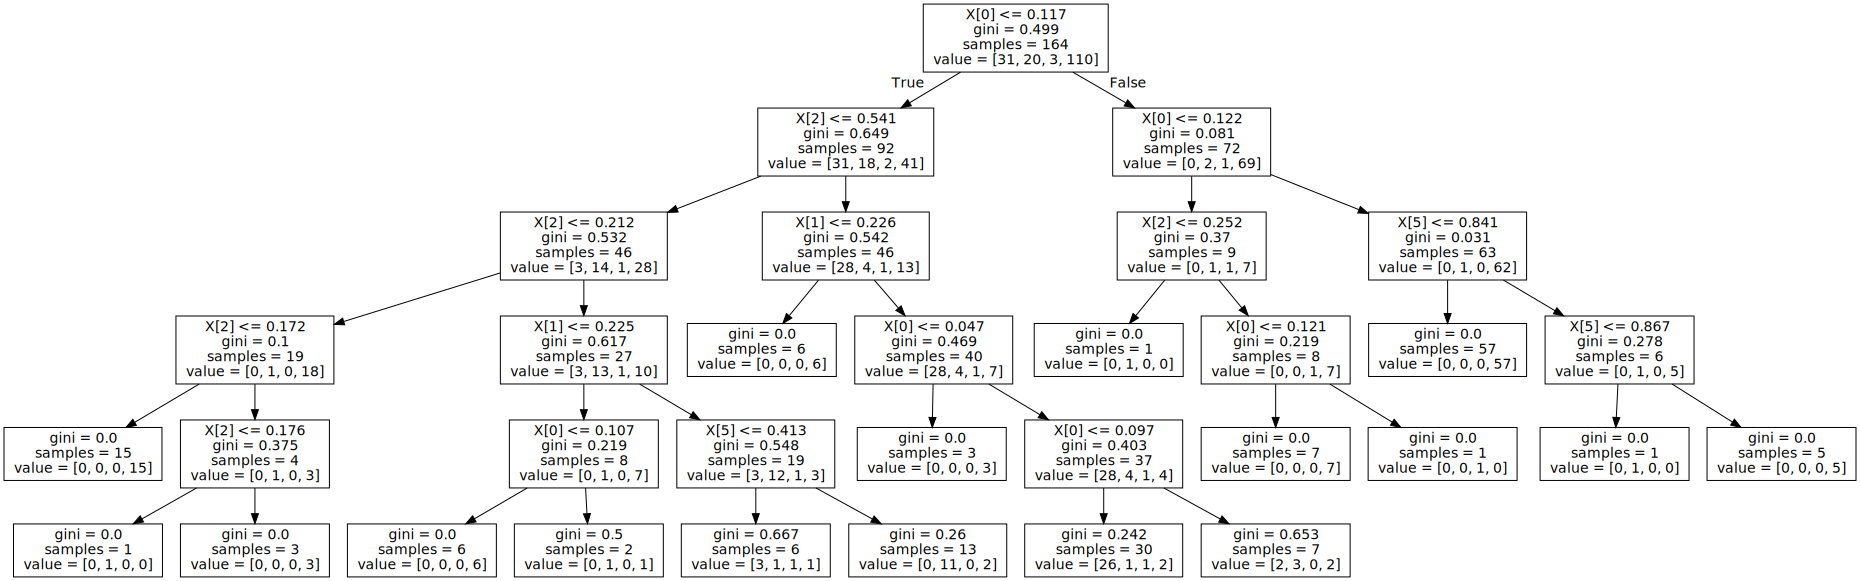

In [101]:
tree = sk.tree.export_graphviz(clf)
graph = graphviz.Source(tree)
graph.render("tree")
graph